In [1]:
!pip install mlxtend

# BOOK DataSet

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [3]:
book=pd.read_csv("C:\\Users\\ASUS\\Downloads\\DATA SCIENCE\\ASSIGNMENTS\\Association rule\\book.csv")
book

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


In [4]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


# Apriori Algorithm 

In [5]:
# at min_support=0.2 , support values will be more then 0.2
frequent_itemsets_2=apriori(book, min_support=0.2, use_colnames=True)
frequent_itemsets_2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"


In [6]:
rules2 = association_rules(frequent_itemsets_2, metric="lift", min_threshold=0.7)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [7]:
rules2.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [8]:
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.256,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.256,0.605201,1.404179,0.073687,1.441240


In [9]:
df1=pd.DataFrame(data=frequent_itemsets_2)
df1
df1.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
dtype: bool

Text(0, 0.5, 'confidence')

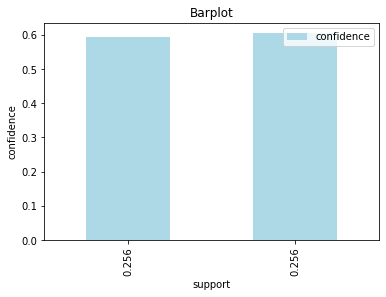

In [10]:
# visualization of obtained rule
rules2.plot(kind='bar',x='support',y='confidence',color='lightblue')
plt.title('Barplot')
plt.xlabel('support')
plt.ylabel('confidence')

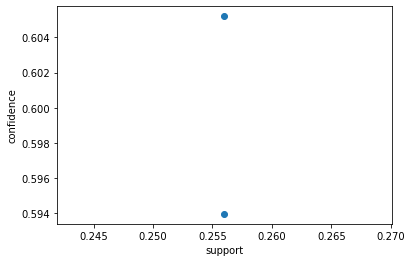

In [23]:
plt.scatter(rules2.support,rules2.confidence)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [11]:
#at min_support=0.17 , support values will be greater then 0.17
frequent_itemsets_17=apriori(book, min_support=0.17, use_colnames=True)
frequent_itemsets_17

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(CookBks, ChildBks)"
8,0.1840,"(DoItYBks, ChildBks)"
9,0.1950,"(GeogBks, ChildBks)"


In [12]:
rules17 = association_rules(frequent_itemsets_17, metric="lift", min_threshold=0.7)
rules17

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
5,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
9,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


In [13]:
rules17.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
5,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
4,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
8,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
9,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
3,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
2,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240


In [14]:
rules17[rules17.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
1,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
2,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
3,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
4,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
5,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
9,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


In [15]:
df17=pd.DataFrame(data=frequent_itemsets_17)
df17
df17.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
dtype: bool

Text(0, 0.5, 'confidence')

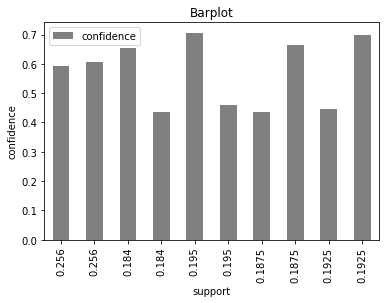

In [16]:
rules17.plot(kind='bar',x='support',y='confidence',color='grey')
plt.title('Barplot')
plt.xlabel('support')
plt.ylabel('confidence')

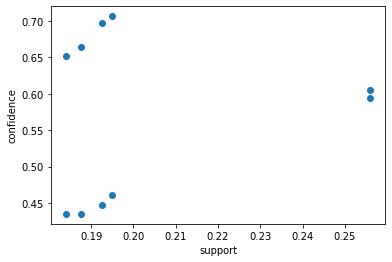

In [24]:
plt.scatter(rules17.support,rules17.confidence)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

In [17]:
#at min_support=0.15 , support values will be greater then 0.17
frequent_itemsets_15=apriori(book, min_support=0.15, use_colnames=True)
frequent_itemsets_15

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(CookBks, ChildBks)"
9,0.1840,"(DoItYBks, ChildBks)"


In [18]:
rules15 = association_rules(frequent_itemsets_15, metric="lift", min_threshold=0.7)
rules15

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [19]:
rules15.sort_values('lift',ascending = False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


In [20]:
rules15[rules15.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
3,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
4,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
5,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464


In [21]:
df15=pd.DataFrame(data=frequent_itemsets_15)
df15
df15.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

<Figure size 1440x720 with 0 Axes>

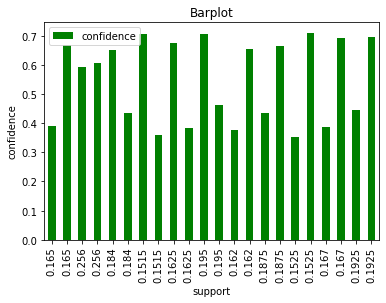

<Figure size 1440x720 with 0 Axes>

In [22]:
rules15.plot(kind='bar',x='support',y='confidence',color='green')
plt.title('Barplot')
plt.xlabel('support')
plt.ylabel('confidence')
plt.figure(figsize=(20,10))

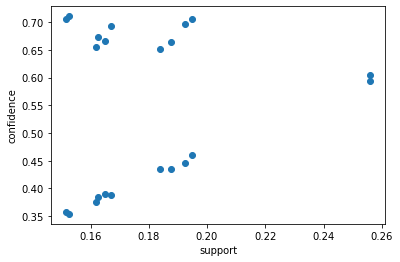

In [25]:
plt.scatter(rules15.support,rules15.confidence)
plt.xlabel('support')
plt.ylabel('confidence')
plt.show()

Text(0.5, 1.0, 'Relation Between Min Support Value and Frequent Itemsets')

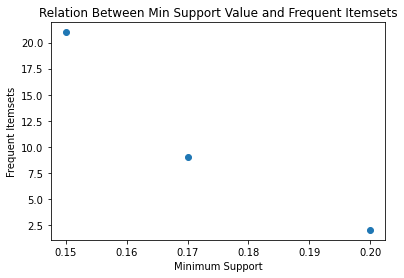

In [26]:
x=[0.15,0.17,0.2]
y=[21,9,2]
plt.scatter(x,y)
plt.xlabel('Minimum Support')
plt.ylabel('Frequent Itemsets')
plt.title('Relation Between Min Support Value and Frequent Itemsets')